# Backtesting with Backtrader

### Dependencies

In [1]:
import sqlite3
from datetime import datetime
from collections import OrderedDict

import quandl
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
import pandas as pd
from pandas import DataFrame
import backtrader as bt
from backtrader.feeds import PandasData
import pandas_datareader as web

ModuleNotFoundError: No module named 'quandl'

In [3]:
rcParams['figure.figsize'] = [14, 8]

In [60]:
conn = sqlite3.connect('db.sqlite3')
c = conn.cursor()
c.execute("SELECT * FROM sentimental_index WHERE ticker='JPM'")
df = pd.DataFrame(c.fetchall())
df.drop([0, 1], axis=1, inplace=True)
df.set_index(2, inplace=True)
df.index.name = 'Date'
df.index = pd.to_datetime(df.index)
df.columns = ['mean rating', 'one week', 'two weeks', 'three weeks', 'four weeks']
for col in df.columns:
    df[col] = pd.to_numeric(df[col])
print('{} - {}'.format(min(df.index), max(df.index)))

2017-09-15 00:00:00 - 2019-08-09 00:00:00


In [122]:
test_df

,Open,High,Low,Close,Volume,mean rating,one week,two weeks,three weeks,four weeks
Date,,,,,,,,,,
2017-09-15,91.080,91.7100,90.7600,91.62,17937920.0,1.000000,0.0,0.0,0.0,0.0
2017-09-18,91.930,93.1350,91.8500,92.92,11122136.0,1.000000,0.0,0.0,0.0,0.0
2017-09-19,92.710,94.3600,92.5200,93.94,12467547.0,1.000000,0.0,0.0,0.0,0.0
2017-09-20,94.100,95.2900,93.7100,94.60,15121034.0,1.000000,0.0,0.0,0.0,0.0
2017-09-21,94.460,95.3700,94.1900,95.03,9858800.0,-1.000000,0.0,0.0,0.0,0.0
2017-09-22,94.700,94.9800,94.4300,94.83,7783377.0,-1.000000,0.0,0.0,0.0,0.0
2017-09-25,94.510,94.8800,93.4500,94.12,10334950.0,-1.000000,0.0,0.0,0.0,0.0
2017-09-26,93.780,94.0300,93.3410,93.70,9308871.0,1.000000,0.0,0.0,0.0,0.0
2017-09-27,94.970,95.7200,94.5800,95.18,14862076.0,1.000000,0.0,0.0,0.0,0.0


In [61]:
test_df = ord_dict['JPM'].merge(df, left_index=True, right_index=True)

### Calling the data

In [4]:
quandl.ApiConfig.api_key = "CS5oDw_odnpx92tt6kiF"
start_date = datetime(2017, 1, 1)
end_date = datetime(2018, 1, 1)
tickers = ['AAPL', 'GOOGL', 'FB', 'TSLA', 'MSFT', 'AMZN', 'NFLX', 'JPM', 'XOM', 'INTC']
ord_dict = OrderedDict()
for ticker in tickers:
    ord_dict[ticker] = quandl.get(
        'WIKI/{}'.format(ticker),
        start_date=start_date,
        end_date=end_date)
    ord_dict[ticker] = ord_dict[ticker][['Open', 'High', 'Low', 'Close', 'Volume']]

In [5]:
ord_dict.keys()

odict_keys(['AAPL', 'GOOGL', 'FB', 'TSLA', 'MSFT', 'AMZN', 'NFLX', 'JPM', 'XOM', 'INTC'])

In [6]:
ord_dict['AAPL'].index

DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-17',
               ...
               '2017-12-15', '2017-12-18', '2017-12-19', '2017-12-20',
               '2017-12-21', '2017-12-22', '2017-12-26', '2017-12-27',
               '2017-12-28', '2017-12-29'],
              dtype='datetime64[ns]', name='Date', length=249, freq=None)

### Observer

In [7]:
class Observer(bt.Observer):
    alias = ('CashValue',)
    lines = ('cash', 'value')
    
    def next(self):
        self.lines.cash[0] = self._owner.broker.getcash()
        self.lines.value[0] = self._owner.broker.getvalue()

### Strategies

In [8]:
class RsiStrategy(bt.Strategy):

    def log(self, txt, dt=None):
        # Logging function for this strategy
        dt = dt or self.datas[0].datetime.date(0)
        # print('%s, %s' % (dt.isoformat(), txt))
    
    def __init__(self):
        self.rsi = bt.indicators.RSI_SMA(self.data.close, period=10)
        
    def next(self):
        self.log('Close, %.2f' % self.data.close[0])
        if not self.position:
            if self.rsi < 30:
                self.buy(size=100)
        else:
            if self.rsi > 70:
                self.sell(size=100)
                

class MacdStrategy(bt.Strategy):

    def __init__(self):
        self.macd = bt.indicators.MACD(
            self.data,
            period_me1=self.p.macd1,
            period_me2=self.p.macd2,
            period_signal=self.p.macdsig)
 
        # Cross of macd.macd and macd.signal
        self.mcross = bt.indicators.CrossOver(self.macd.macd, self.macd.signal)
 
        # To set the stop price
        self.atr = bt.indicators.ATR(self.data, period=self.p.atrperiod)
 
        # Control market trend
        self.sma = bt.indicators.SMA(self.data, period=self.p.smaperiod)
        self.smadir = self.sma - self.sma(-self.p.dirperiod)


class MacStrategy(bt.Strategy):
    params = (
        ('long_period', 50),
        ('short_period', 20),
    )
    
    def log(self, txt, dt=None):
        # Logging function for this strategy
        dt = dt or self.datas[0].datetime.date(0)
        #print('%s, %s' % (dt.isoformat(), txt))
    
    def __init__(self):
        self.sma_long = bt.ind.SMA(period=self.p.long_period)
        self.sma_short = bt.ind.SMA(period=self.p.short_period)
        self.crossover = bt.ind.CrossOver(self.sma_long, self.sma_short)
    
    def next(self):
        if self.crossover > 0:
            # enter long
            self.buy()
        elif self.crossover < 0:
            # close long position
            self.close()
            
            
class SentdexStrategy(bt.Strategy):

    def __init__(self):
        self.close = self.datas[0].close
        self.mean_rating = self.datas[0].mean_rating
        self.one_week = self.datas[0].one_week
        self.two_weeks = self.datas[0].two_weeks
        self.three_weeks = self.datas[0].three_weeks
        self.four_weeks = self.datas[0].four_weeks
    
    def next(self):
        # buy signal
        if self.mean_rating[0] > 0:
            self.buy(size=1000)
        # sell signal
        elif self.mean_rating[0] < 0:
            self.buy(size=100)

### Extension of Data Feeds

In [145]:
class PandasData_Sentdex(PandasData):

    # add lines to the already existing lines
    lines = (
        'mean_rating',
        'one_week',
        'two_weeks',
        'three_weeks',
        'four_weeks',
    )
    
    # add parameter to the parameters inherited from the base class
    params = (
        ('mean_rating', 'mean rating'),
        ('one_week', 'one week'),
        ('two_weeks', 'two weeks'),
        ('three_weeks', 'three weeks'),
        ('four_weeks', 'four weeks'),
    )
    datafields = PandasData.datafields + (['mean_rating', 'one_week', 'two_weeks', 'three_weeks', 'four_weeks'])

### Backtest with Sentdex

10000.0
array('d', [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 129.2965, 129.7873, 130.26670000000001, 130.7637, 131.2023, 131.6509, 132.0871, 132.5049, 132.9375, 133.4327, 133.9151, 134.3939, 134.8715, 135.3455, 135.8393, 136.3203, 136.7559, 137.1839, 137.60829999999999, 138.0083, 138.41729999999998, 138.6633, 138.9293, 139.1717, 139.3795, 139.5977, 139.8023, 140.0267, 140.2751, 140.482316, 140.657716, 140.820516, 141.045616, 141.281416, 141.488616, 141.677016, 141.92561600000002, 142.25241599999998, 142.593016, 142.918416, 143.201616, 143.544416, 143.862816, 144.185416, 144.400016, 144.670816, 144.956416, 145.253416, 145.54541600000002, 145.832416, 146.100616, 146.359016, 146.63261599999998, 146.858616, 147.125416, 147.406016, 147.666216, 147.94241599999998, 148.232216, 148.456016, 148

/Users/seowjiajun/anaconda3/envs/env_zipline35/lib/python3.5/site-packages/backtrader/plot/plot.py:127: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use('nbagg')


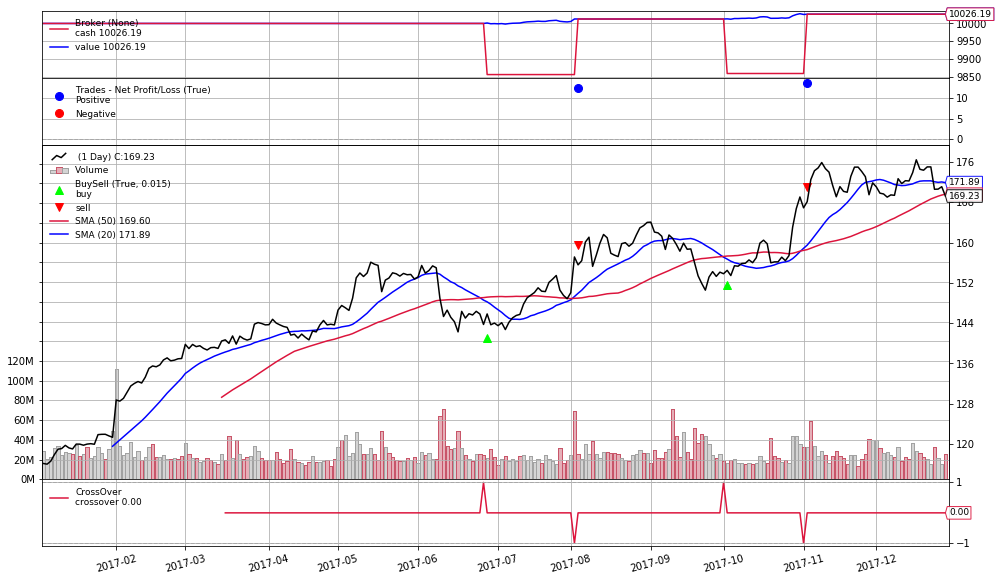

In [25]:
if __name__ == '__main__':
    cerebro = bt.Cerebro()
    cerebro.addstrategy(MacStrategy)
    cerebro.addobserver(Observer)
    cerebro.broker.setcash(10000.00)
    data = PandasData(dataname=ord_dict['AAPL'])
    cerebro.adddata(data)
    print(cerebro.broker.get_cash())
    results = cerebro.run()
    results = results[0]
    print(results.sma_long.array)
    print(cerebro.broker.get_cash())
    cerebro.plot()

### Backtest w/o Sentdex

In [9]:
if __name__ == '__main__':
    strategies = {
        'RsiStrategy': RsiStrategy,
        'MacStrategy': MacStrategy,
    }
    cash = {}
    for strategy in strategies:
        cash[strategy] = {}
        for ticker in tickers:
            cerebro = bt.Cerebro()
            cerebro.addstrategy(strategies[strategy])
            cerebro.addobserver(Observer)
            cerebro.broker.setcash(10000.00)
            data = PandasData(dataname=ord_dict[ticker])
            cerebro.adddata(data)
            cash[strategy][ticker] = {}
            cash[strategy][ticker]['starting_cash'] = cerebro.broker.get_cash()
            results = cerebro.run()
            print(results[0])
            cash[strategy][ticker]['ending_cash'] = cerebro.broker.get_cash()

In [456]:
rsi_df = DataFrame(cash['RsiStrategy']).transpose()[['starting_cash', 'ending_cash']]
rsi_stats = {
    'Mean': rsi_df['ending_cash'].mean(),
    'Var': rsi_df['ending_cash'].var(),
    'Std': rsi_df['ending_cash'].std(),
    'Min': rsi_df['ending_cash'].min(),
    '25%': rsi_df['ending_cash'].quantile(.25),
    '50%': rsi_df['ending_cash'].quantile(.5),
    '75%': rsi_df['ending_cash'].quantile(.75),
    'Max': rsi_df['ending_cash'].max(),
}
rsi_df

,starting_cash,ending_cash
AAPL,10000.0,10000.0
AMZN,10000.0,10000.0
FB,10000.0,10000.0
GOOGL,10000.0,10000.0
INTC,10000.0,10513.0
JPM,10000.0,11007.0
MSFT,10000.0,11653.0
NFLX,10000.0,10000.0
TSLA,10000.0,10000.0
XOM,10000.0,10124.0


In [457]:
mac_df = DataFrame(cash['MacStrategy']).transpose()[['starting_cash', 'ending_cash']]
mac_stats = {
    'Mean': mac_df['ending_cash'].mean(),
    'Var': mac_df['ending_cash'].var(),
    'Std': mac_df['ending_cash'].std(),
    'Min': mac_df['ending_cash'].min(),
    '25%': mac_df['ending_cash'].quantile(.25),
    '50%': mac_df['ending_cash'].quantile(.5),
    '75%': mac_df['ending_cash'].quantile(.75),
    'Max': mac_df['ending_cash'].max(),
}
mac_df

,starting_cash,ending_cash
AAPL,10000.0,10026.190
AMZN,10000.0,10046.210
FB,10000.0,9823.450
GOOGL,10000.0,10083.515
INTC,10000.0,10000.010
JPM,10000.0,10011.710
MSFT,10000.0,10000.000
NFLX,10000.0,9853.175
TSLA,10000.0,10015.610
XOM,10000.0,10002.315


In [459]:
stats = {
    'mac_stats': mac_stats,
    'rsi_stats': rsi_stats,
}
stats_df = DataFrame(stats).transpose()[['Mean', 'Var', 'Std', 'Min', '25%', '50%', '75%', 'Max']]
stats_df

,Mean,Var,Std,Min,25%,50%,75%,Max
mac_stats,9986.2185,6778.930739,82.334262,9823.45,10000.0025,10007.0125,10023.545,10083.515
rsi_stats,10329.7000,326442.455556,571.351429,10000.00,10000.0000,10000.0000,10415.750,11653.000
